In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [109]:
data=pd.read_csv("/content/predict taxi/train.csv")
data.head()

test_data= pd.read_csv('/content/predict taxi/test.csv')

In [75]:
# checking NA values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       1
pickup_longitude      1
pickup_latitude       1
dropoff_longitude     1
dropoff_latitude      1
store_and_fwd_flag    1
trip_duration         1
dtype: int64

In [76]:
tripdata = data['trip_duration']

In [77]:
tripdata.head()

0     455.0
1     663.0
2    2124.0
3     429.0
4     435.0
Name: trip_duration, dtype: float64

In [78]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [79]:
data.drop('trip_duration', axis=1, inplace=True)

In [80]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N


In [81]:
tripdata.head()

0     455.0
1     663.0
2    2124.0
3     429.0
4     435.0
Name: trip_duration, dtype: float64

In [82]:
tripdata=pd.DataFrame(tripdata)

In [83]:
tripdata.head()

,trip_duration
0,455.0
1,663.0
2,2124.0
3,429.0
4,435.0


**DATA EXPLORATION**

---



In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167743 entries, 0 to 167742
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  167743 non-null  object 
 1   vendor_id           167743 non-null  int64  
 2   pickup_datetime     167743 non-null  object 
 3   dropoff_datetime    167743 non-null  object 
 4   passenger_count     167742 non-null  float64
 5   pickup_longitude    167742 non-null  float64
 6   pickup_latitude     167742 non-null  float64
 7   dropoff_longitude   167742 non-null  float64
 8   dropoff_latitude    167742 non-null  float64
 9   store_and_fwd_flag  167742 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 12.8+ MB


In [85]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,167743.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000
mean,1.534294,1.663102,-73.973396,40.751049,-73.973410,40.752019
std,0.498824,1.310748,0.038565,0.029035,0.036468,0.033060
min,1.000000,0.000000,-75.455917,39.803932,-74.562355,40.225800
25%,1.000000,1.000000,-73.991829,40.737358,-73.991318,40.736131
50%,2.000000,1.000000,-73.981720,40.754219,-73.979736,40.754608
75%,2.000000,2.000000,-73.967178,40.768440,-73.962898,40.769951
max,2.000000,6.000000,-73.334023,43.486885,-72.711395,43.486885


In [86]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167743 entries, 0 to 167742
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trip_duration  167742 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [87]:
tripdata.describe()

,trip_duration
count,167742.000000
mean,945.382099
std,3071.139205
min,1.000000
25%,395.000000
50%,662.000000
75%,1075.000000
max,86390.000000


In [88]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       1
pickup_longitude      1
pickup_latitude       1
dropoff_longitude     1
dropoff_latitude      1
store_and_fwd_flag    1
dtype: int64

In [89]:
tripdata.isnull().sum()

trip_duration    1
dtype: int64

In [90]:
#dropping missing value becouse there is only one missing value in each coloumn.
data.dropna(inplace=True)
tripdata.dropna(inplace=True)

In [91]:
# after dropping missing value of data
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [92]:
# after dropping missing value of tripdata
tripdata.isnull().sum()

trip_duration    0
dtype: int64

In [93]:
# counting frequency of each category
tripdata.value_counts()

trip_duration
357.0            207
367.0            207
369.0            204
469.0            202
374.0            200
                ... 
4035.0             1
4041.0             1
4042.0             1
4049.0             1
86390.0            1
Length: 4570, dtype: int64

**PLOTTING CHARTS FOR DATA**

In [94]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N


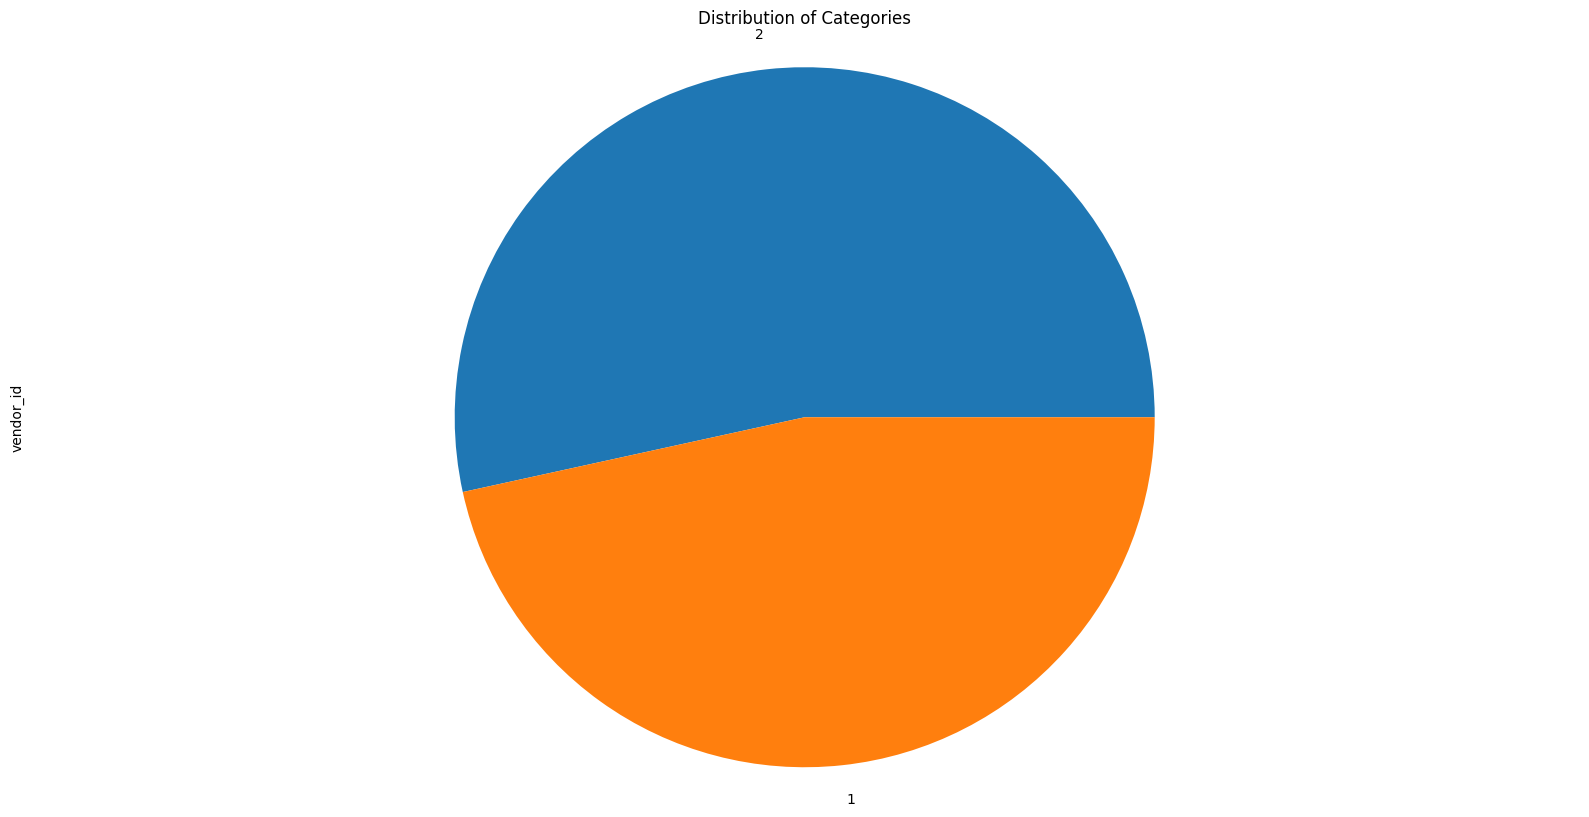

In [95]:
#plotting data
#Explore categorical variables:

data['vendor_id'].value_counts().plot(kind='pie')
plt.axis('equal')  # Ensures the pie chart is circular
plt.title('Distribution of Categories')
plt.show()


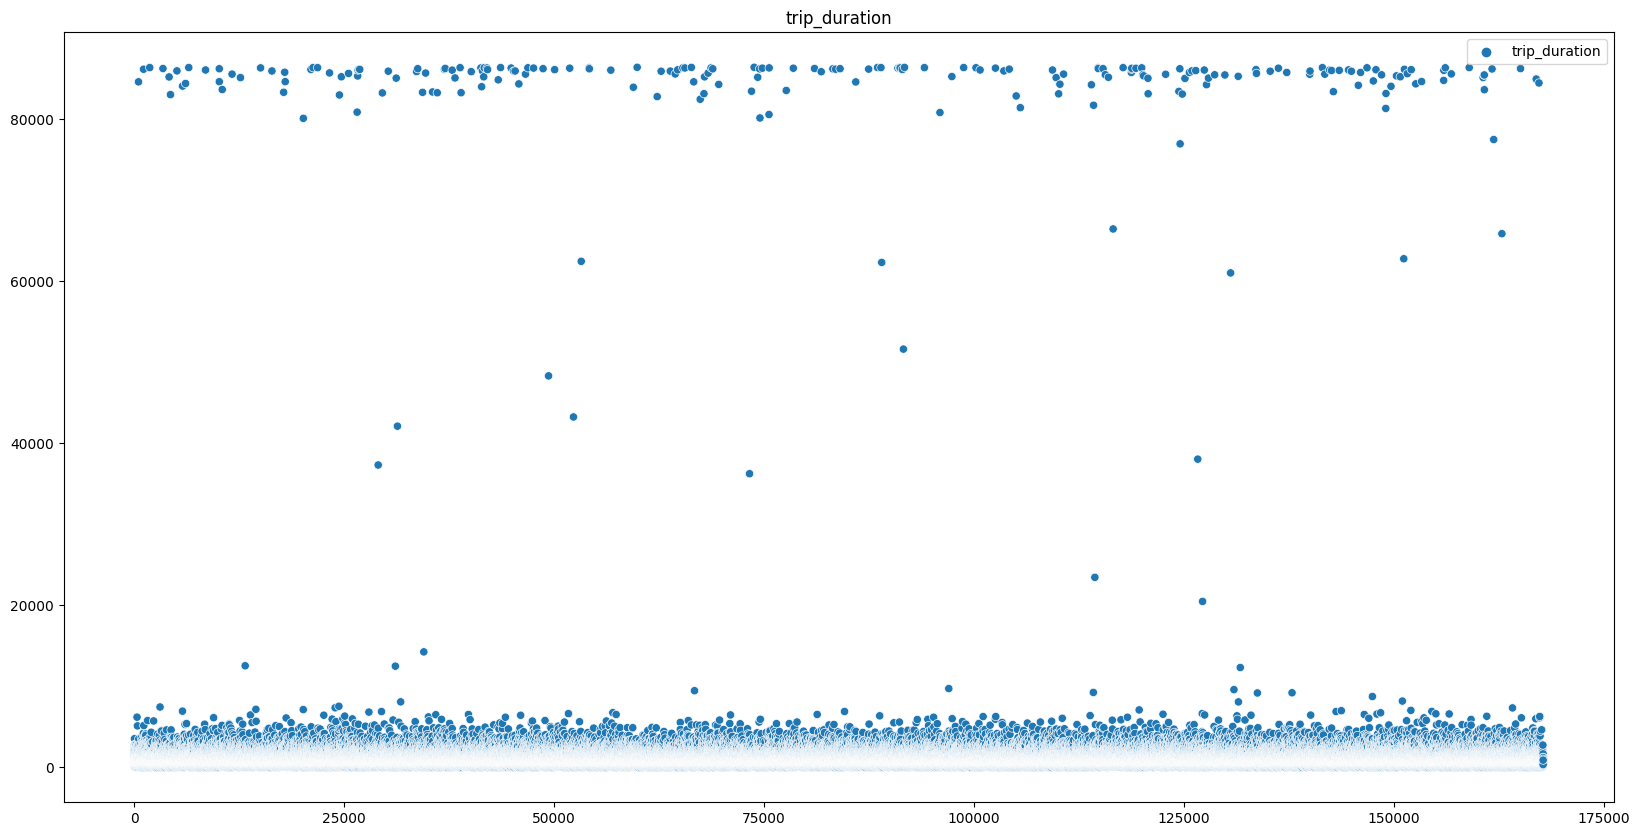

In [106]:
# tripdata.value_counts().plot(kind='pie')
# plt.axis('equal')  # Ensures the pie chart is circular
# plt.title('Distribution of Categories')
# plt.show()


sns.scatterplot( data=tripdata)
plt.title('trip_duration')
plt.show()

**Explore categorical variables:**

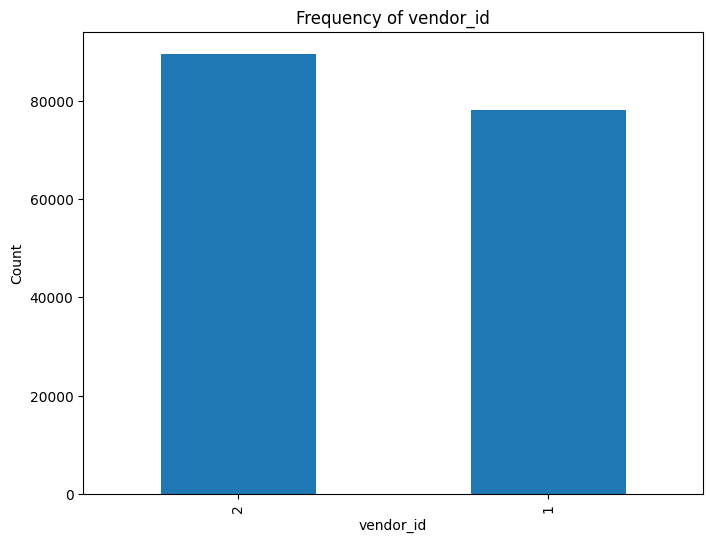

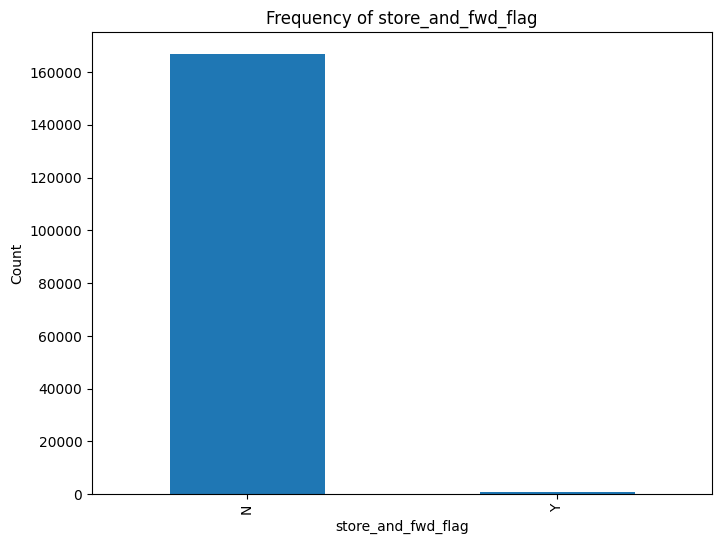

In [96]:
# Select the categorical variable(s) you want to explore and plot
#Explore categorical variables:
categorical_vars = ['vendor_id', 'store_and_fwd_flag']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    data[var].value_counts().plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Frequency of {var}')
    plt.show()

**Visualize numerical variables:**

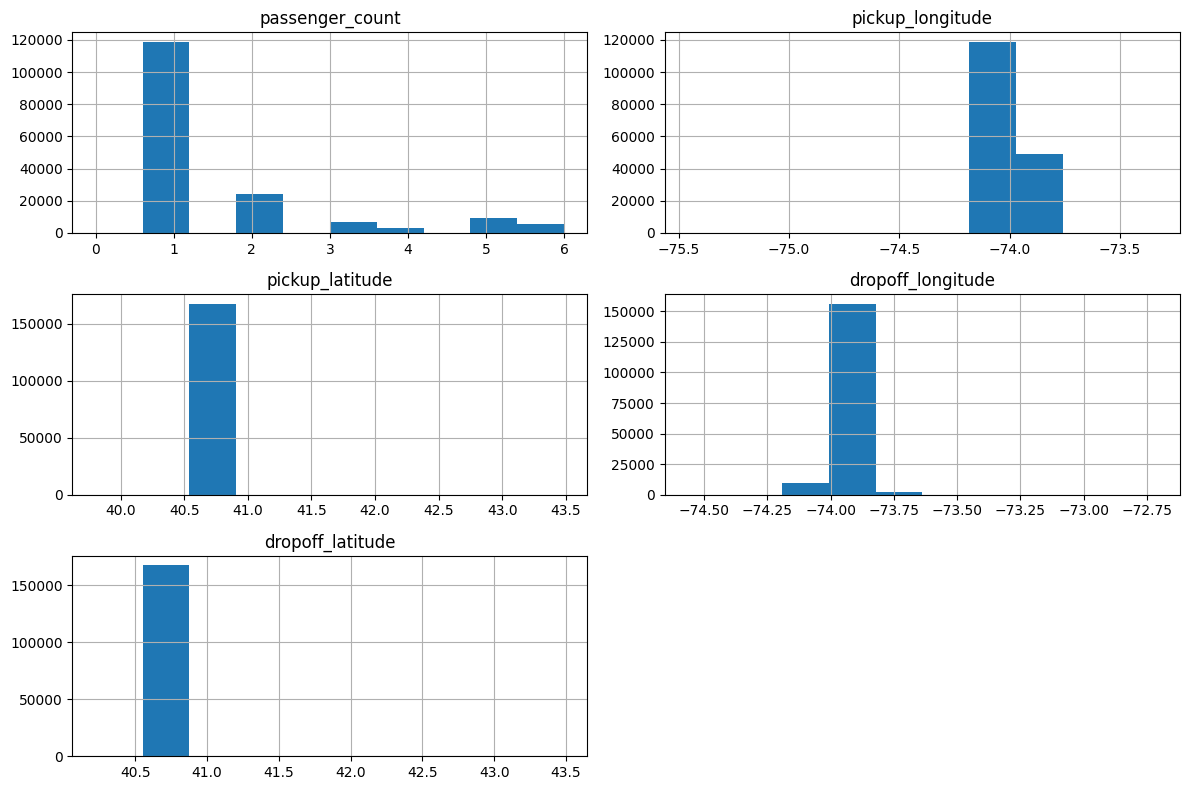

In [98]:
# Select the numerical variables for visualization
#Visualize numerical variables:
numerical_vars = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

# Plot histograms for numerical variables
data[numerical_vars].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

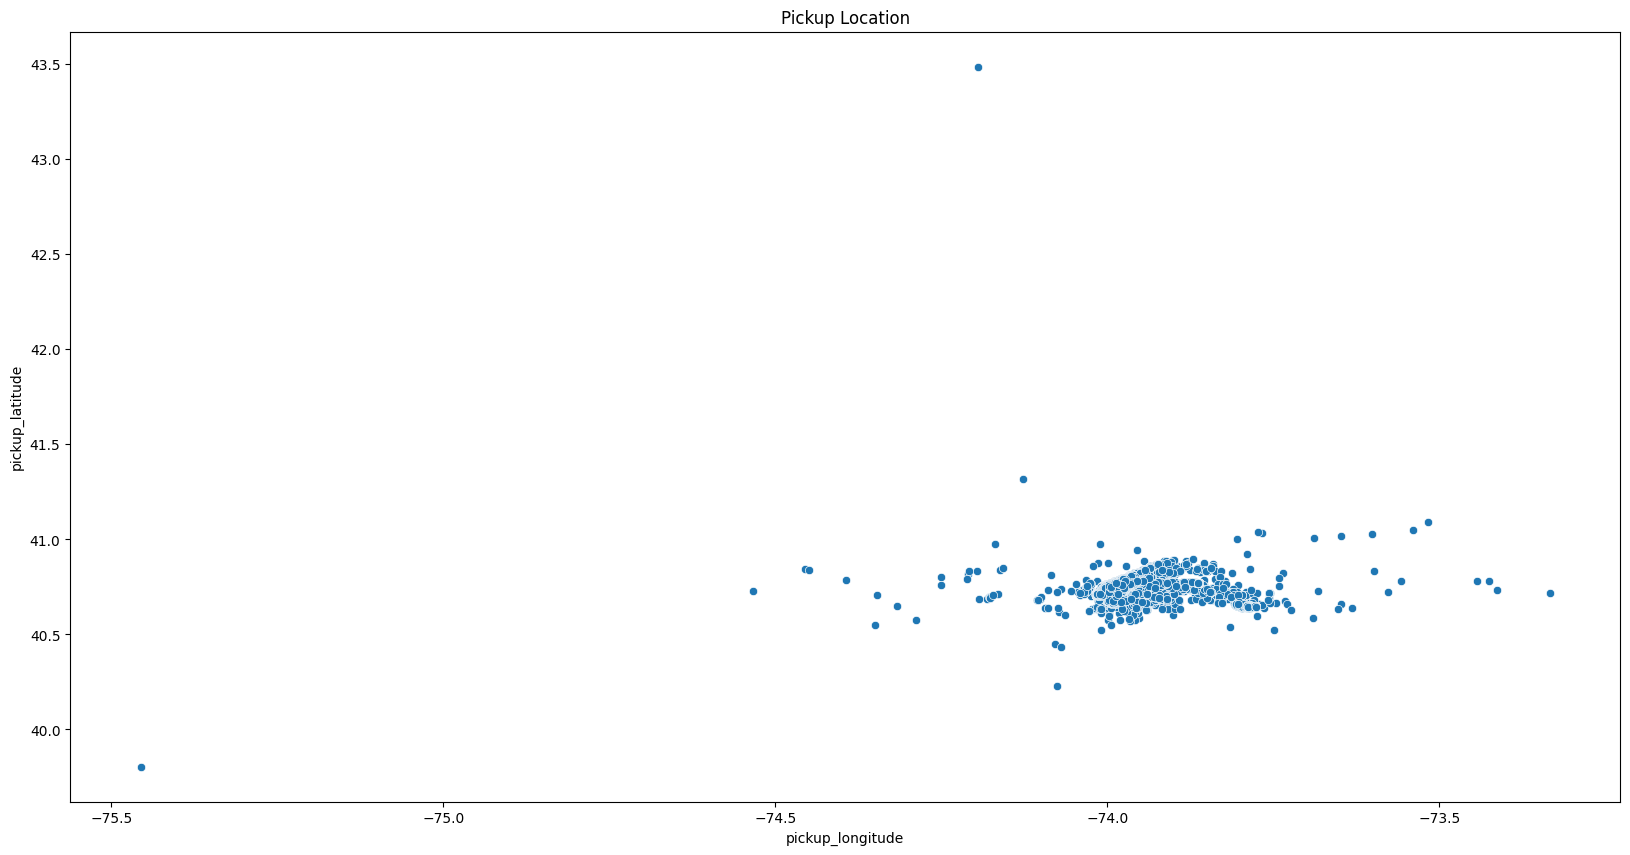

In [99]:
#Visualize numerical variables:
# Create scatter plots for latitude and longitude variables
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=data)
plt.title('Pickup Location')
plt.show()

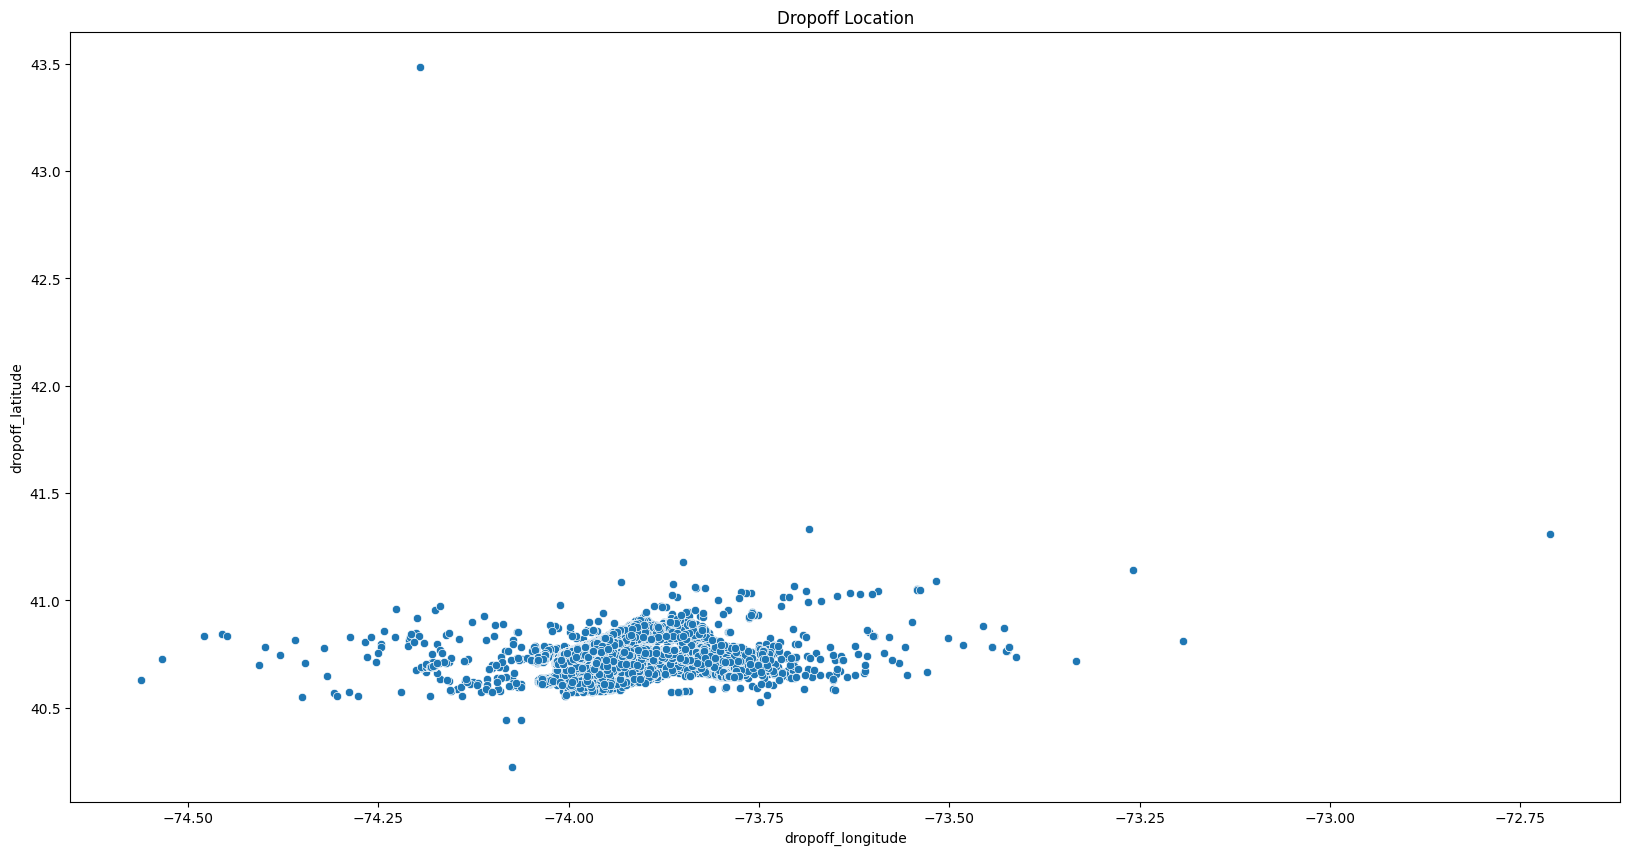

In [100]:
#Visualize numerical variables:
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=data)
plt.title('Dropoff Location')
plt.show()

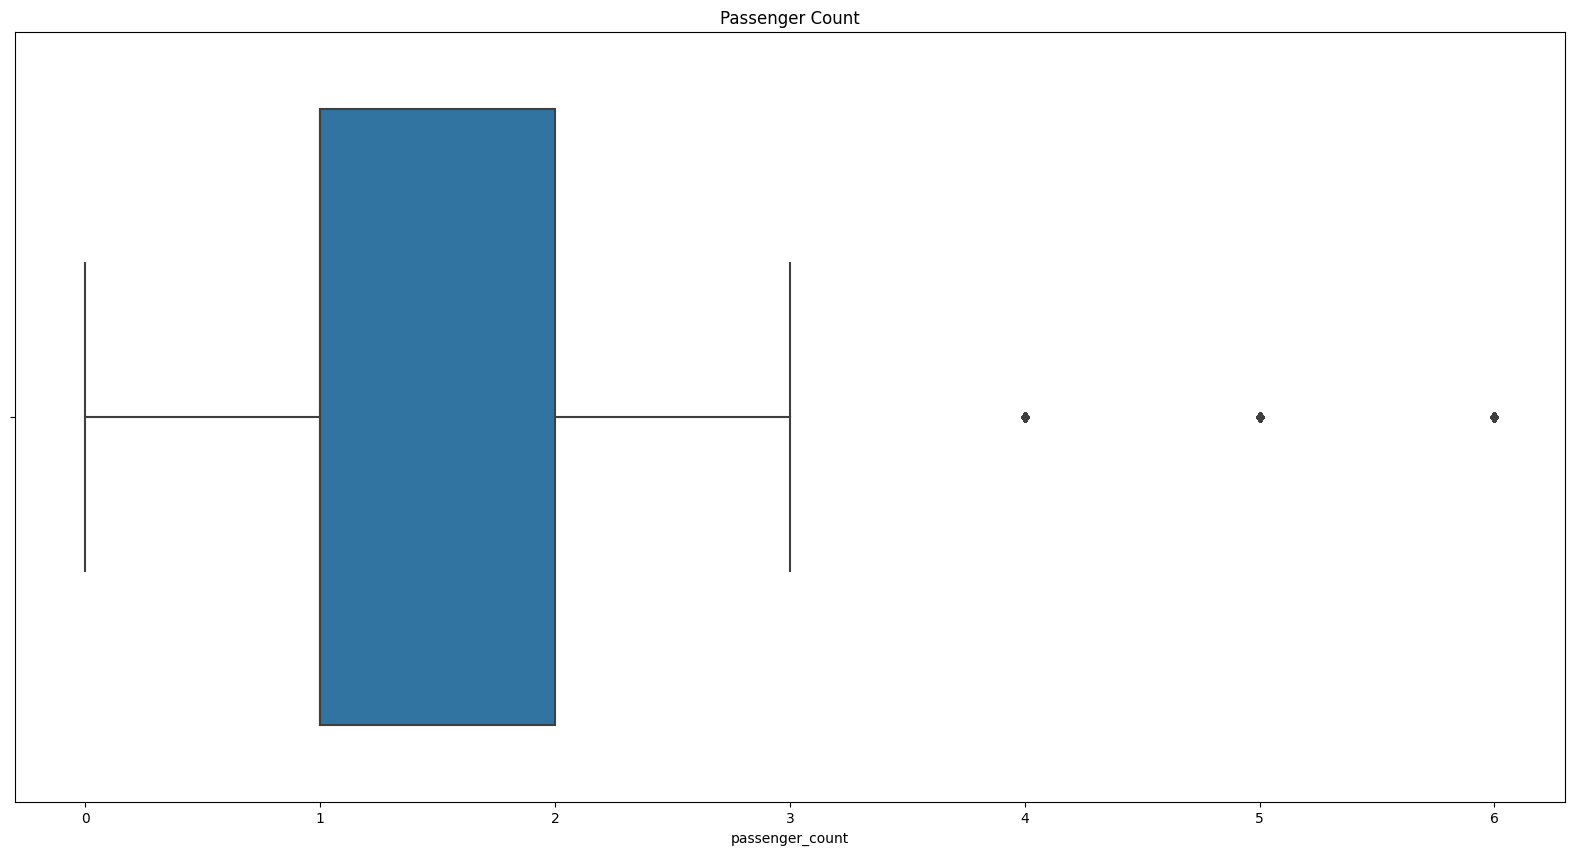

In [101]:
# Create box plots for passenger count
#Visualize numerical variables:
sns.boxplot(x='passenger_count', data=data)
plt.title('Passenger Count')
plt.show()

**Explore relationships between variables:**

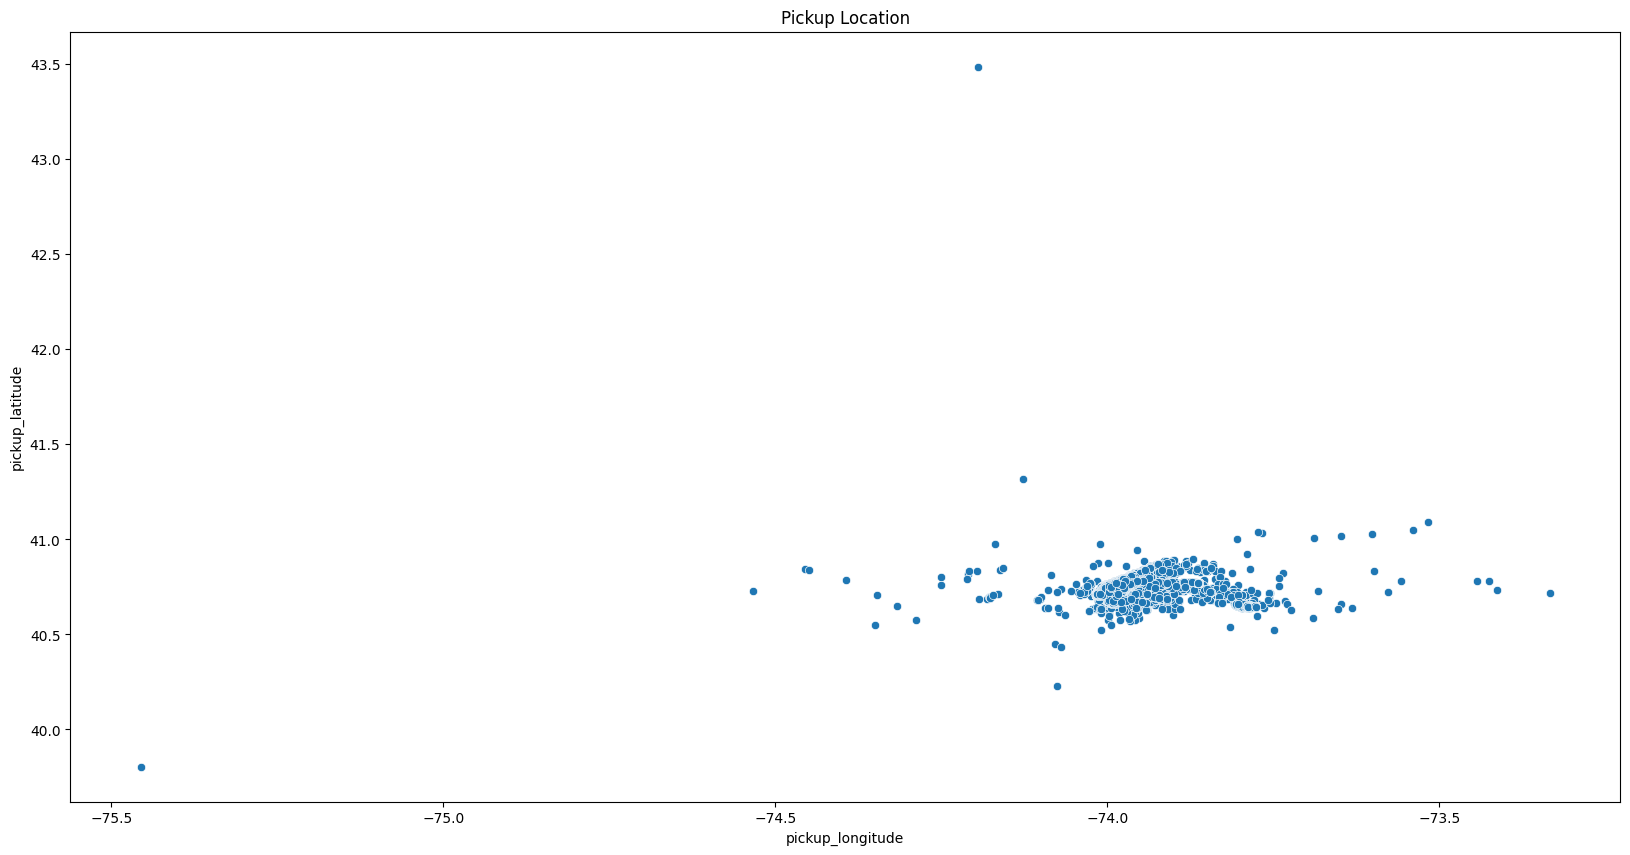

In [102]:
# Explore relationships between variables using scatter plots
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=data)
plt.title('Pickup Location')
plt.show()

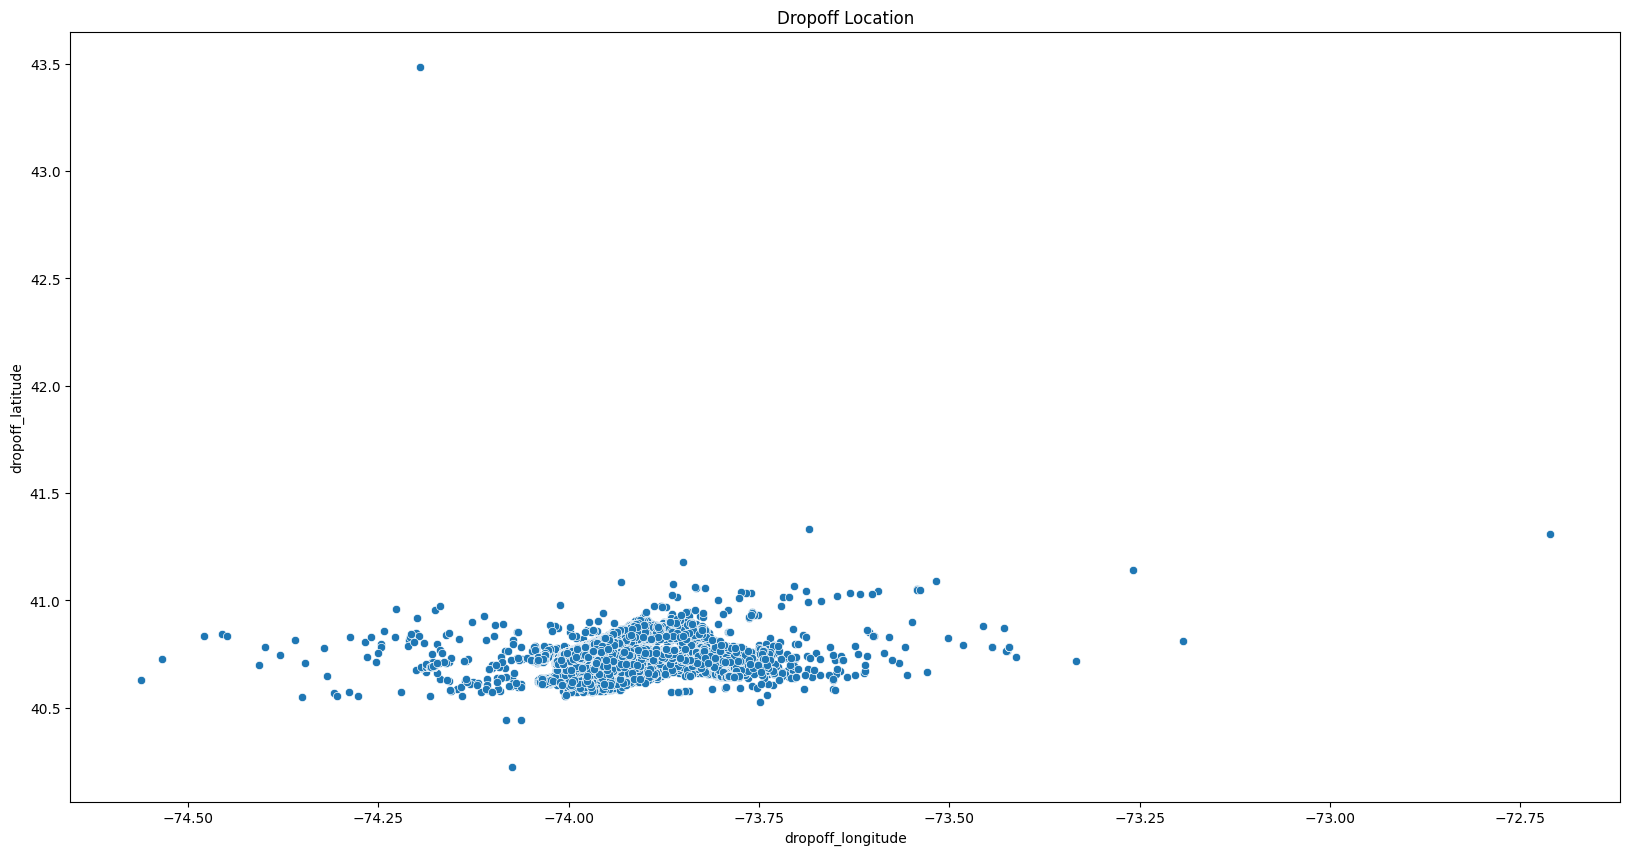

In [103]:
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=data)
plt.title('Dropoff Location')
plt.show()

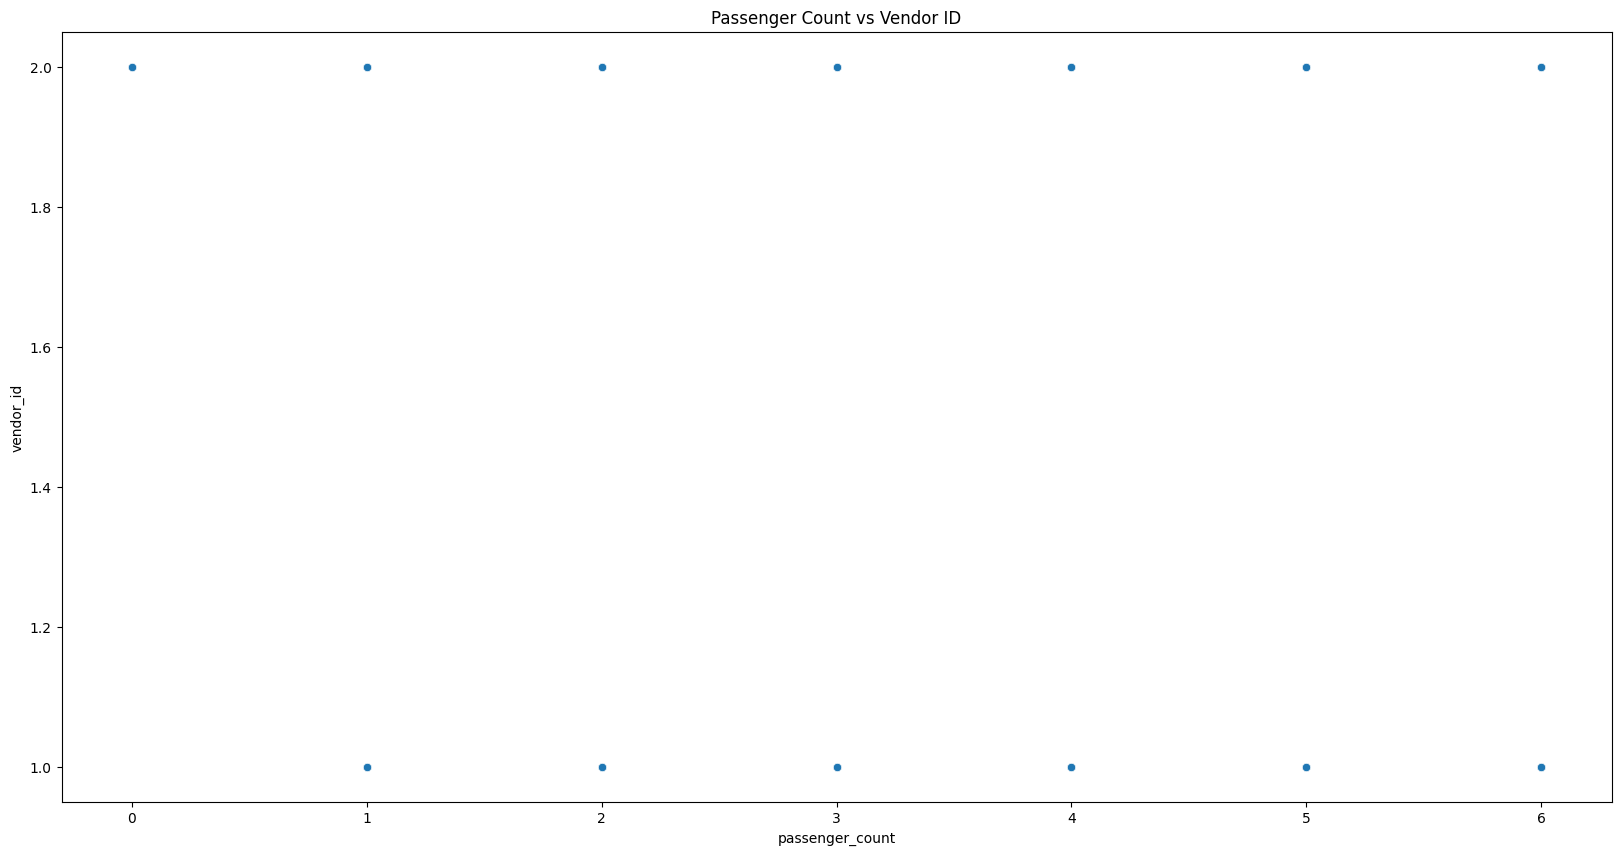

In [104]:
sns.scatterplot(x='passenger_count', y='vendor_id', data=data)
plt.title('Passenger Count vs Vendor ID')
plt.show()

In [ ]:
X_train = data
y_train = tripdata

In [110]:
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

In [ ]:
# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)